# Code Parameters 
* The discount factor, gamma has been set to 0.9
* The environment is slippery, ie., the transition kernel is stochastic

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')
gamma=0.9

In [3]:
# Make sure env is declared 
def return_prob(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        if y==A[i][1]:
            return A[i][0]
    # If y is not part of the Range, print 0
    return 0
def return_reward(y,x,a):
    if not env:
        return -2
    A = env.P[x][a]
    for i in range(len(A)):
        #print("A :",A[i][1])
        #print("y :",y)
        
        if y==A[i][1]:
            return A[i][2]
    
    # If y isn't part of the range
    return 0
        
        
    
    

In [4]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
import numpy as np
V_global=[]
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

In [5]:
def norm_diff(V1,V2):
    A=np.sum(np.fabs(V1- V2))
    return A

def ValueIteration(env,gamma):
    global V_global
    ## HyperParameter
    delta=0.00001
    Plt_list=[] # For Plotting Convergence
    
    V=np.zeros(16)
    V_old=np.zeros(16)
    Policy =np.random.randint(0,3,16)
    #print("Initial Policy: ", Policy)
    #n_state, reward, terminal, _ = env.step(action)
    
    while True: #Make it true
        V_old=np.copy(V)
        # Crap MAX!!!!!  V_old = V creates an alias for it!!! Not a copy. Why in God's hell will that happen??
        #print("V1 is ",V_old)
        
        for x in range(env.nS):
            # a=Policy[x] #Action from that Policy - there is one action for every state
            #print("V is ",V)
            #print("in top of for loop")
            #print("V1 is ",V_old)
            #tsum =0.0
            tmax=0.0
            ta=0
            #print("State ", x)
            for a in range(env.nA):
                tsum=0.0
                for y in range(env.nS):
                    
#                     if return_reward(y,x,a):
#                         print("Old tsum ", tsum)
                    
                    tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_old[y])
#                     if tsum:
#                         print("y ", y)
#                         print("x ",x)
#                         print("a ", a)
#                         print("Prob ", return_prob(y,x,a))
#                         print("Reward ",return_reward(y,x,a))
#                         print("gamma ", gamma)
#                         print("V_old ", V_old[y])
#                         print("tsum", tsum)
#                         print("---------------")
                    # At this Point, I get that summation
                
                #print("Current Action: ", a)
                #print("Current Value Function: ", tsum)

                if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
                    tmax=tsum
                    ta=a

                if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
                    ta=a
                    tmax=tsum
#                 if tsum:
#                     print("Reinitialising tsum and a is ",a, " x is ", x)
                tsum=0.0
            #print("Action Decided: ", ta)
            # At this point I get the best Action Possible (ta)
            Policy[x]=ta
            #print("Before Assingment")
#             print("V is ",V)
#             print("in bottom of for loop")
#             print("V1 is ",V_old)
            
            V[x] = tmax # Assign the maximum Value to the Value Function
#             print("After Assingment")
#             print("V is ",V)
#             print("in bottom of for loop")
#             print("V1 is ",V_old)
#             print("-----------------------------------------\n\n")
            
#         print("out of for loop")
        
        Plt_list.append(norm_diff(V_old,V))
        #print(norm_diff(V_old,V))
        plt.plot(Plt_list, 'ro')
#         print("V1 is ", V_old)
        #print("V is", V)
    
    
        
        if norm_diff(V_old,V) < delta:
            print(Policy)
            fancy_visual(V,Policy)
            V_global=V
            return Policy
        
    # By now, I have old Value Function - V1 and new Value Function V
    
    
    
    # For Plotting
    
    


SFFF
FHFH
FFFH
HFFG
[1 3 0 0 0 0 0 0 3 1 0 0 0 2 1 0]
Value Function [0.06279689 0.05806242 0.07268536 0.0311503  0.08846729 0.
 0.11153923 0.         0.14363035 0.24667323 0.29911348 0.
 0.         0.37950242 0.638834   0.        ]
Policy [1 3 0 0 0 0 0 0 3 1 0 0 0 2 1 0]


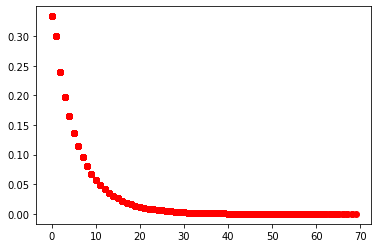

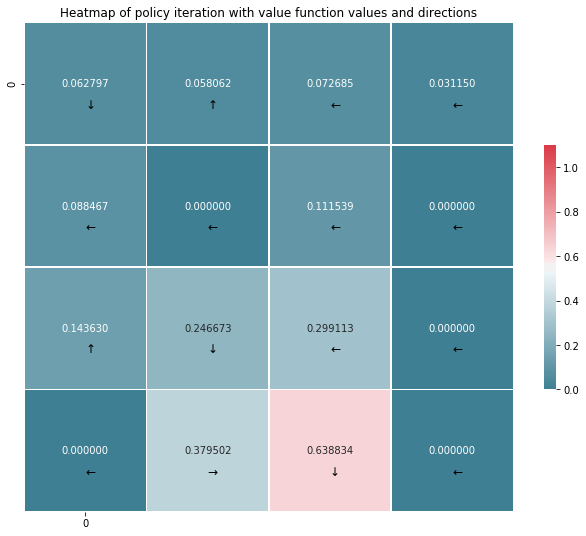

0
1
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [6]:
state = env.reset()
env.render()
VI_Policy=ValueIteration(env,gamma)
for i in VI_Policy:
    action=i
    observation, reward, done, info = env.step(action) # take a random action
    #env.render()
    print(observation)
    

    

In [7]:
print("Optimal Q Function")
Q=np.zeros((env.nS,env.nA))


for x in range(env.nS):
    tmax=0.0
    ta=0
    for a in range(env.nA):
        tsum=0.0
        for y in range(env.nS):
            tsum=tsum+return_prob(y,x,a)*(return_reward(y,x,a) + gamma*V_global[y])
#             if a==0: # Initializing tmax and the corresponding action leading to the max Value Function
#                 tmax=tsum
#                 ta=a
#             if tmax<tsum: # If there's an action with a better Value Function - Replace it with that
#                 ta=a
#                 tmax=tsum
        Q[x][a] = tsum
        tsum=0.0
        #Policy[x]=ta
        
print("Optimal Q Function", Q)

Optimal Q Function
Optimal Q Function [[0.04537925 0.06279798 0.06279798 0.03625779]
 [0.03625779 0.04064467 0.03922433 0.0580634 ]
 [0.0726861  0.06022559 0.06461247 0.04856942]
 [0.0311507  0.0311507  0.00934509 0.0311507 ]
 [0.08846836 0.06962929 0.06192817 0.04537925]
 [0.         0.         0.         0.        ]
 [0.11153965 0.08973404 0.11153965 0.02180561]
 [0.         0.         0.         0.        ]
 [0.06962929 0.11709107 0.10054215 0.14363126]
 [0.15693983 0.24667387 0.20358477 0.13282315]
 [0.29911394 0.26565217 0.22511197 0.10746374]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18785269 0.30550093 0.37950289 0.26565217]
 [0.39523497 0.63883426 0.61471758 0.5369181 ]
 [0.         0.         0.         0.        ]]
